<a href="https://colab.research.google.com/github/lhalloran/COMPEST/blob/master/TP_geol_app_traitement_donnees_erreurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP Experiences et Labo en géologie appliquée**

Traitement de données, calcul d'erreur

04.03.2021

Landon Halloran

landon.halloran@unine.ch




In [2]:
# importez les modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#%% pourquoi l'erreur
fig, ax = plt.subplots()
ax.bar([1,2], [6,7], align='center', alpha=0.5, ecolor='black', capsize=10,color=['g','r'])
ax.set_ylabel('Rendement (%)')
ax.set_xticks([1,2])
ax.set_xticklabels(['Süper-value fund','Mëga-growth fund'])
ax.yaxis.grid(True)

fig, ax = plt.subplots()
ax.bar([1,2], [6,7], yerr=[4,15], align='center', alpha=0.5, ecolor='black', capsize=10,color=['g','r'])
ax.set_ylabel('Rendement (%)')
ax.set_xticks([1,2])
ax.set_xticklabels(['Süper-value fund','Mëga-growth fund'])
ax.yaxis.grid(True)

fig, ax = plt.subplots()
x=np.arange(0,2000,1)
y1=norm.pdf(x,1000*1.06,1000*0.04)
y2=norm.pdf(x,1000*1.07,1000*0.15)
ax.fill(x,y1,alpha=0.5,c='g')
ax.fill(x,y2,alpha=0.5,c='r')
ax.set_xlim([800,1300])
ax.set_ylabel('probabilité')
ax.set_xlabel('valeur (CHF) de votre investissement après un an')
ax.grid()
print('probabilité perte, süper-value = ' + str(np.sum(y1[0:1000])))
print('probabilité perte, mëga-growth = ' + str(np.sum(y2[0:1000])))

In [ ]:
#%% 
#numbers with uncertainties
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [64,56,61,40],'k',marker='o', linestyle='none',linewidth=0,markersize=12)
ax.errorbar([1,2,3,4], [64,56,61,40], yerr=[12,6,20,23],c='k',linestyle='none',capsize=10)
ax.set_ylabel('Age (ka)',fontsize=14)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['A','B','C','D'],fontsize=12)
ax.yaxis.grid(True)

# box plots (boîte à moustache)
boxdata = pd.DataFrame()
fig, ax = plt.subplots()
for i in range(10): # créez (fausse) données...
    spread = np.random.rand(20) * 20 + 50
    center = np.ones(5) * 60
    flier_high = np.random.rand(3) * 10 + 75
    flier_low = np.random.rand(3) * 10 + 35
    datanow = np.concatenate((spread, center, flier_high, flier_low))
    np.random.shuffle(datanow)
    boxdata[i] = datanow
ax.boxplot(boxdata.transpose(),whis=[5,95]) # créez box plot
ax.set_ylabel('Age (ka)',fontsize=14)
ax.set_xlabel('Site',fontsize=14)

fig, ax = plt.subplots()
ax.plot(boxdata[0],'k',marker='x', linestyle='none',linewidth=0,markersize=10)
ax.set_xlabel('échantillon',fontsize=14)
ax.set_ylabel('Age (ka)',fontsize=14)

In [ ]:
# Gaussian distribution
x=np.arange(-3,3,0.01)
y=norm.pdf(x,0,1)
fig, ax = plt.subplots()
ax.plot(x,y,lw=3)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('f(x)',fontsize=14)
ax.grid()

# fill 1 sigma
x=np.arange(-3,3,0.01)
y=norm.pdf(x,0,1)
fig, ax = plt.subplots()
ax.plot(x,y,lw=3,c='k')
ax.fill_between(x[200:400],y[200:400],0,alpha=0.5,color='b')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('f(x)',fontsize=14)
ax.grid()

# fill 2 sigma
x=np.arange(-3,3,0.01)
y=norm.pdf(x,0,1)
fig, ax = plt.subplots()
ax.plot(x,y,lw=3,c='k')
ax.fill_between(x[100:500],y[100:500],0,alpha=0.5,color='g')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('f(x)',fontsize=14)
ax.grid()

# fill 3 sigma
x=np.arange(-4,4,0.01)
y=norm.pdf(x,0,1)
fig, ax = plt.subplots()
ax.plot(x,y,lw=3,c='k')
ax.fill_between(x[100:700],y[100:700],0,alpha=0.5,color='r')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('f(x)',fontsize=14)
ax.grid()

In [ ]:
#%% valeur-p
x=np.arange(-4,4,0.01)
y=norm.pdf(x,0,1)
fig, ax = plt.subplots()
ax.plot(x+10,y,lw=3,c='k')
ax.fill_between(x[600:]+10,y[600:],0,alpha=0.5,color='y')
ax.set_xlabel('conc. du minéral X (%)',fontsize=14)
ax.set_ylabel('distribution f(x)',fontsize=14)
ax.grid()


In [ ]:
#%% angle de pendage. moyenne et écart-type pondérés et non-pondérés
dipa = np.array([45.,45,40,35,45]) # le . après le premier chiffre assure que numpy considère les valeurs comme "floats"
dipasigma = np.array([5.,10,10,5,10])
print('moyenne non-pondérée = '+ str(np.mean(dipa)))
print('écart-type non-pondérée = '+ str(np.std(dipa,ddof=1)))
dipapoids = dipasigma**(-2) # definir les poids
print('moyenne pondérée = '+ str(np.average(dipa,weights=dipapoids)))
sigmapond = np.sqrt(np.cov(dipa, aweights=dipapoids)) # malhereusement le std() dans numpy n'a pas de pondérage implémenté, donc voici un "hack" simple (ici le matrice de covariance est 1x1)
print('écart-type pondérée = '+ str(sigmapond))

Text(0.5, 1.0, 'E = 48.990046598946236 +/- 1.2619162076646602 GPa')

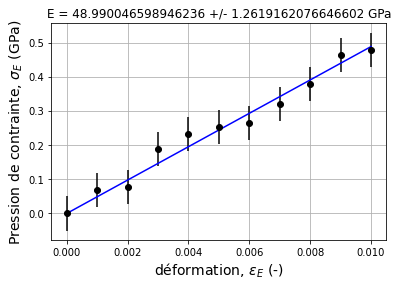

In [3]:
#%% Ajustement des courbes exemple - module de Young
deformation = np.array([0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009,0.01])
#P = deformation*50 + np.random.normal(0,0.05,size=(11))
P = np.array([0,  0.06780143,  0.07808708,  0.18884035,  0.23348198,
        0.2526252 ,  0.26518975,  0.32043891,  0.38090508,  0.46565133,
        0.48013039])
# 
fig, ax = plt.subplots()
ax.errorbar(deformation,P,yerr=0.05,fmt='ko') # uncertainty of P measurements is 0.05 GPa

def function_for_fit(x,a): # pour le liniaire il y a d'autres facons de faire, mais ceci est generale
    return x*a

from scipy.optimize import curve_fit
popt,pcov = curve_fit(function_for_fit,deformation,P)
Youngs_modulus = popt.squeeze()
Youngs_modulus_uncertainty = np.sqrt(pcov).squeeze()

# add fit to figure
ax.plot(deformation,function_for_fit(deformation,Youngs_modulus),'b')
ax.set_xlabel('déformation, $\epsilon_E$ (-)',fontsize=14)
ax.set_ylabel('Pression de contrainte, $\sigma_E$ (GPa)',fontsize=14)
ax.grid()
hl_str = 'E = '+str(Youngs_modulus)+' +/- '+str(Youngs_modulus_uncertainty)+' GPa'
ax.set_title(hl_str)

Text(0.5, 1.0, 'E = 48.990046598946236 +/- 1.2619162076646602 GPa')

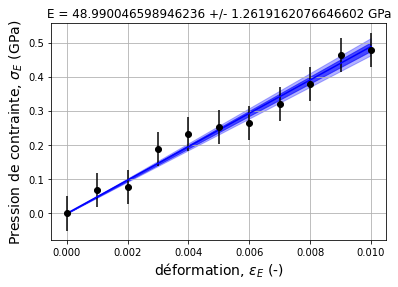

In [4]:
#%% exemple module de Young, avec +/- 1 et 2 sigma
# plot with sigma ranges
fig, ax = plt.subplots()
t_for_function_plot = np.arange(0,100,0.01) # 50 yrs

ax.fill_between(deformation,function_for_fit(deformation,Youngs_modulus+Youngs_modulus_uncertainty).flatten(),function_for_fit(deformation,Youngs_modulus-Youngs_modulus_uncertainty).flatten(),alpha=0.6,color='b')
ax.fill_between(deformation,function_for_fit(deformation,Youngs_modulus+2*Youngs_modulus_uncertainty).flatten(),function_for_fit(deformation,Youngs_modulus-2*Youngs_modulus_uncertainty).flatten(),alpha=0.3,color='b')
ax.plot(deformation,function_for_fit(deformation,Youngs_modulus),'b')
ax.errorbar(deformation,P,yerr=0.05,fmt='ko') 
ax.set_xlabel('déformation, $\epsilon_E$ (-)',fontsize=14)
ax.set_ylabel('Pression de contrainte, $\sigma_E$ (GPa)',fontsize=14)
ax.grid()
ax.set_title(hl_str)

Pour les activités...



In [ ]:
phlogiston_url = 'https://raw.githubusercontent.com/lhalloran/enseignement_extras/main/phlogiston.csv'
atacamite_url = 'https://raw.githubusercontent.com/lhalloran/enseignement_extras/main/atacamite.csv'

datain_phlog = pd.read_csv(phlogiston_url)
datain_ataca = pd.read_csv(atacamite_url)

print(datain_ataca)
print(datain_phlog)
